### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import textwrap

### Loading Data and Exploring Attributes

In [2]:
airbnb = pd.read_csv(r'C:\Users\mboon\OneDrive\Desktop\Python Projects\Project 1\airbnb_2.csv')
print(airbnb.info())
airbnb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [3]:
names = airbnb['neighbourhood_group'].unique()
new_order = [2, 0, 3, 1, 4] # This will make graphing easier later
names = [names[i] for i in new_order]
print(names)

['Queens', 'Brooklyn', 'Staten Island', 'Manhattan', 'Bronx']


### Ranking Boroughs by Total Number of Airbnb Listings

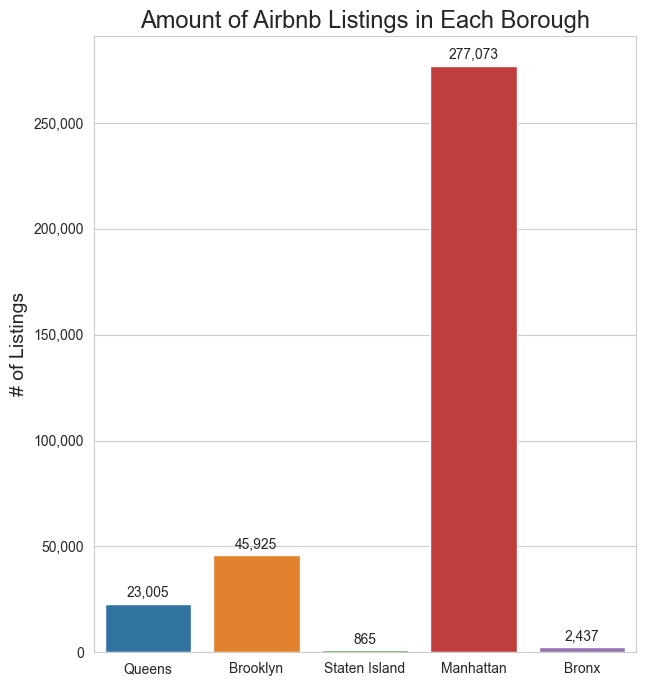

In [4]:
listings = [airbnb[airbnb['neighbourhood_group'] == borough]['calculated_host_listings_count'].sum() for borough in names]

plt.figure(figsize = (7, 8)) 
sns.set_style('whitegrid')

g = sns.barplot(x = names, y = listings)
for i, v in enumerate(listings):
    g.annotate(format(int(v), ','), (i, v + 3000), ha = 'center')

fmt_comma = '{x:,.0f}'
tick_comma = ticker.StrMethodFormatter(fmt_comma)
plt.gca().yaxis.set_major_formatter(tick_comma)
plt.ylabel('# of Listings', fontsize = 14)

plt.title('Amount of Airbnb Listings in Each Borough', fontsize = 17)

plt.show()

### Calculating Percentage of Listings in Each Borough

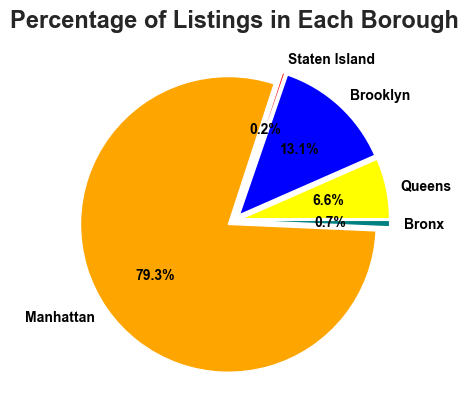

Queens            6.6%
Brooklyn         13.1%
Staten Island     0.2%
Manhattan        79.3%
Bronx             0.7%
Name: Percentage of Listings in Each Borough, dtype: object


In [5]:
total_listings = np.sum(listings)

percentage_listings = []
for i in range(5):
     percentage_listings.append(listings[i]/total_listings)

colors = ['yellow', 'blue', 'red', 'orange', 'teal']
explode = [0.05]*5
plt.pie(percentage_listings, labels = names, colors = colors, autopct = '%1.1f%%',
        explode = explode, textprops = {'color': 'black', 'weight': 'bold'})

title = 'Percentage of Listings in Each Borough'
plt.title(title, fontsize = 17, weight = 'bold')
plt.show()

pairs = dict(zip(names, percentage_listings))
percentage_boroughs = pd.DataFrame.from_dict(pairs, orient = 'index', columns = [title])[title].apply(lambda x: f'{x:.1%}')
print(percentage_boroughs)

### Finding Highest Revenue-Generating Borough

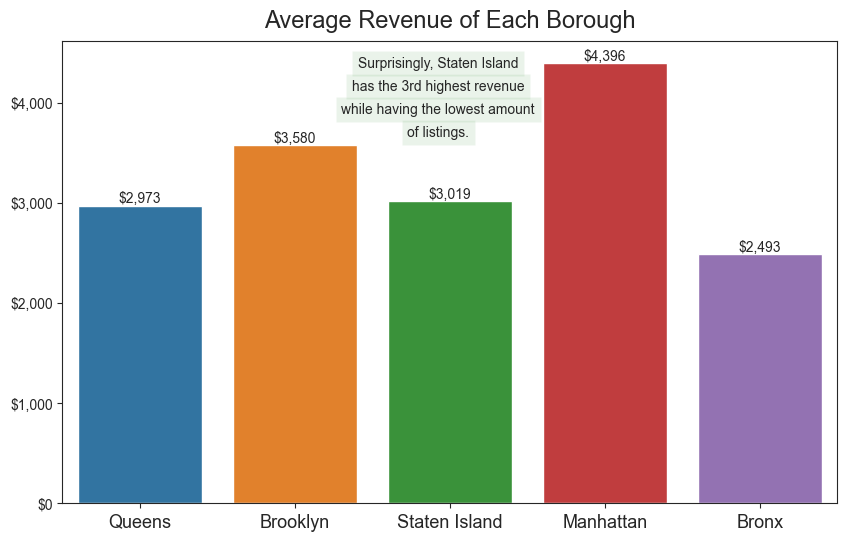

In [6]:
# Approximating revenue with the product of price & # of reviews
# Observation: Some locations may not have received a review or never have been booked.
# This could result in false negative 0's calculated for revenue.
# We will remove these locations from our calculations.
airbnb['Revenue'] = airbnb['price'] * airbnb['number_of_reviews']
filtered_airbnb = airbnb.fillna(0).loc[(airbnb['price'] > 0) & (airbnb['number_of_reviews'] > 0)]
airbnb_mean = filtered_airbnb.groupby('neighbourhood_group')['Revenue'].mean().loc[names]

plt.figure(figsize = (10, 6))
sns.set_style('ticks')

f = sns.barplot(x = airbnb_mean.index, y = airbnb_mean)

for i, v in enumerate(airbnb_mean):
    f.annotate('${:,}'.format(int(v)), (i, v + 30), ha = 'center')

staten_text = 'Surprisingly, Staten Island has the 3rd highest revenue while having the lowest amount of listings.'
wrapped_text = textwrap.wrap(staten_text, width = 30)
si_index = airbnb_mean.index.get_loc('Staten Island')
x = si_index - 0.075
y = f.containers[0][si_index + 1].get_height()
facecolor = f.containers[0][si_index].get_facecolor()
spacing = f.get_ylim()[1] * 0.05

for line in wrapped_text:
    f.text(
        x, y, line, ha = 'center', va = 'center', fontsize = 10,
        bbox = dict(facecolor = facecolor, alpha = 0.1)
    )
    y -= spacing

fmt_dollar = '${x:,.0f}'
tick_dollar = ticker.StrMethodFormatter(fmt_dollar)
plt.gca().yaxis.set_major_formatter(tick_dollar)
f.set_ylabel('')

plt.xticks(fontsize = 13)
plt.xlabel('')

plt.title('Average Revenue of Each Borough', fontsize = 17, pad = 10)

plt.show()

### Selecting the Top 3 Neighbourhoods in the 3 Most Populated Boroughs: Manhattan, Brooklyn, & Queens

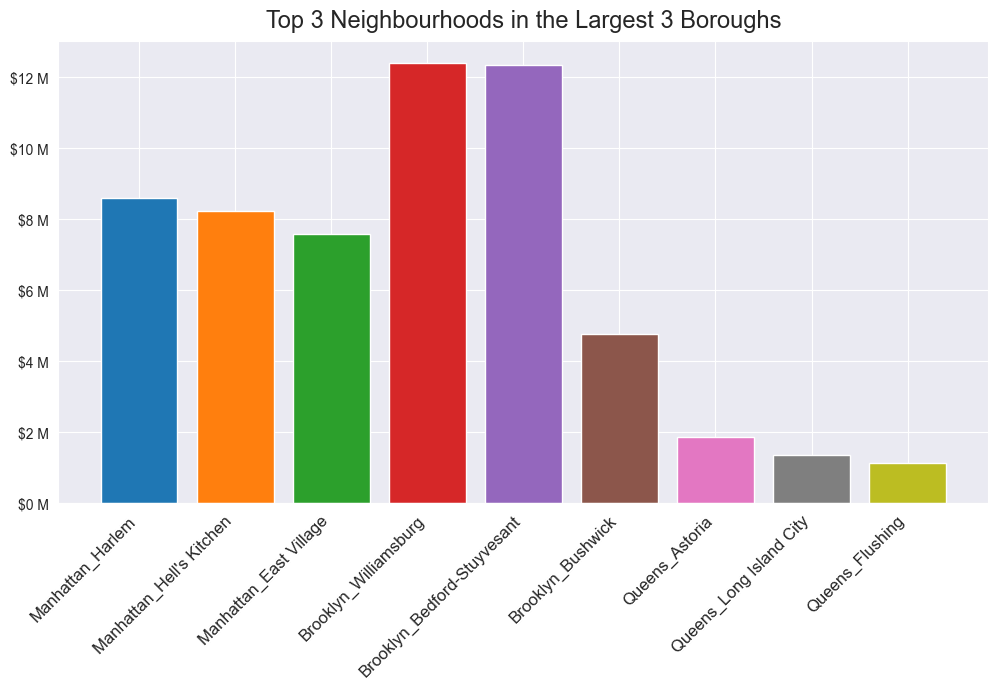

In [7]:
neighbourhood_groups = ['Manhattan', 'Brooklyn', 'Queens']

revenue_data = {}
for group in neighbourhood_groups:
    group_data = airbnb[airbnb['neighbourhood_group'] == group].groupby('neighbourhood')['Revenue'].sum().sort_values(ascending = False)
    revenue_data[group] = {'Revenue': group_data.iloc[:3].tolist(), 'Neighbourhood': group_data.index[:3].tolist()}

plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')

for group, data in revenue_data.items():
    for name, val in zip(data['Neighbourhood'], data['Revenue']):
        plt.bar(f'{group}_{name}', val)

plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

scaler = 10**6
ticks = ticker.FuncFormatter(lambda x, pos: '${:.0f} M'.format(x/scaler))
plt.gca().yaxis.set_major_formatter(ticks)

plt.title('Top 3 Neighbourhoods in the Largest 3 Boroughs', fontsize = 17, pad = 10)

plt.show()

### Viewing All Room Types in Manhattan, Brooklyn, Queens

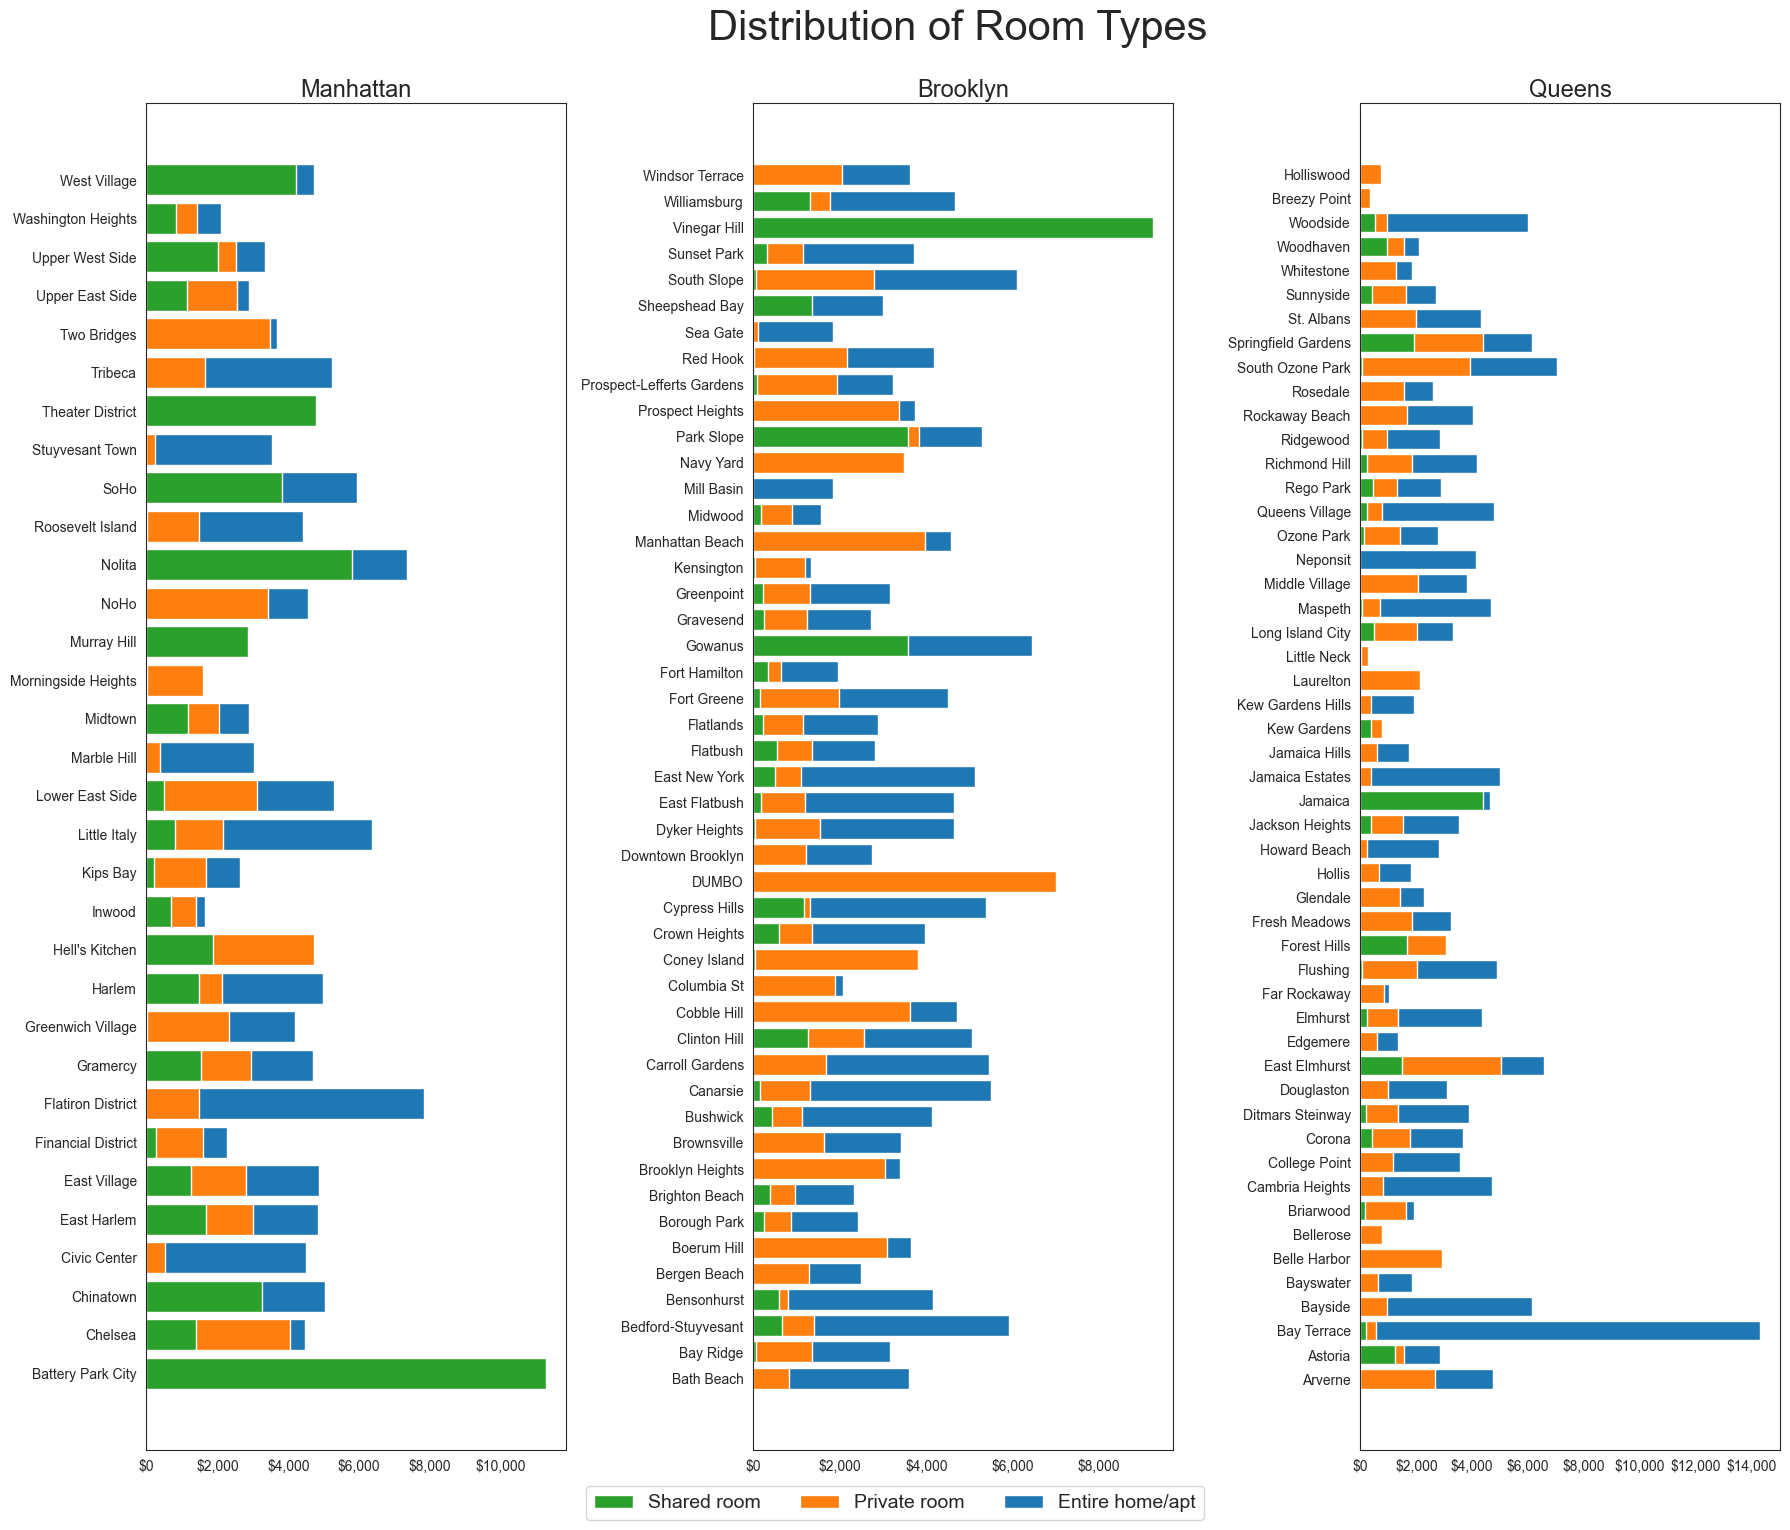

In [8]:
airbnb_rev = airbnb.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['Revenue'].mean().reset_index()

sns.set_style('white')
fig, axes = plt.subplots(1, 3, figsize = (18, 16))
fig.suptitle('Distribution of Room Types', fontsize = 30, y= 1 , x = 0.535)

for borough, ax in zip(neighbourhood_groups, axes):
    borough_data = airbnb_rev.loc[airbnb_rev['neighbourhood_group'] == borough]
    ax.set_title(borough, fontsize = 17, pad = 5)
    ax.xaxis.set_major_formatter(tick_dollar)
    for room_type in borough_data['room_type'].unique():
        room_data = borough_data.loc[borough_data['room_type'] == room_type]
        ax.barh(room_data['neighbourhood'], room_data['Revenue'], label = room_type)

handles, labels = axes[0].get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

fig.legend(
    handles, labels, loc = 'lower center',
    ncol = 3, bbox_to_anchor = (0.5, 0.05), fontsize = 14
)

plt.tight_layout()
plt.subplots_adjust(bottom = 0.1)

plt.show()

### Identifying the Top-Performing Room Types

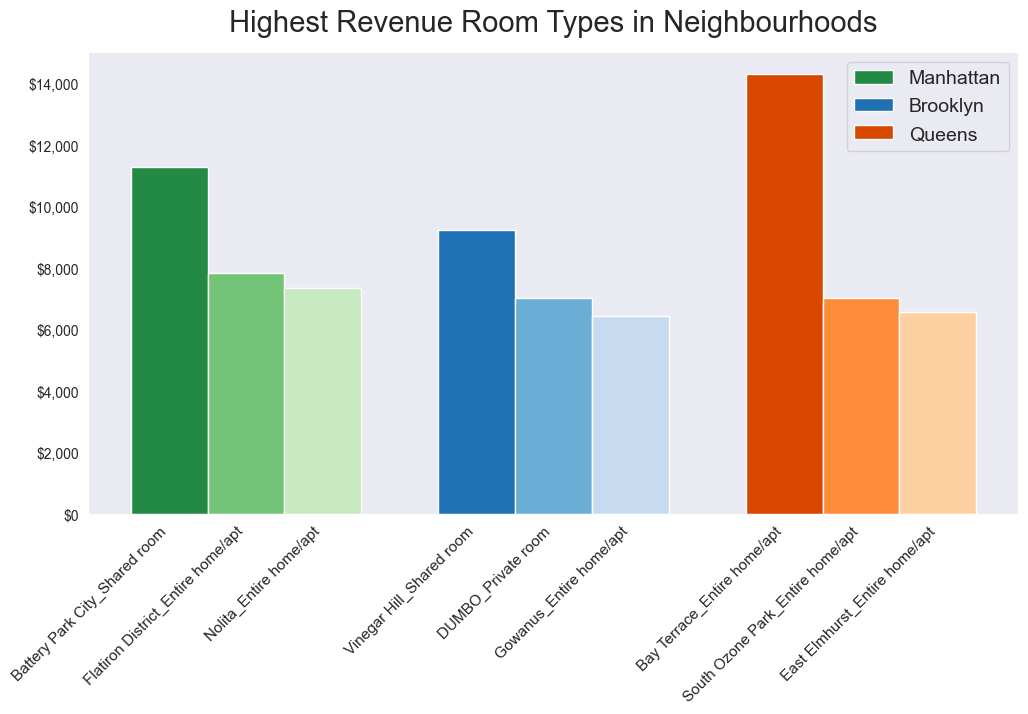

In [9]:
top_3 = {}

for group in neighbourhood_groups:
    group_airbnb_rev = airbnb_rev[airbnb_rev['neighbourhood_group'] == group]
    top_3[group] = group_airbnb_rev.nlargest(3, 'Revenue')

neighbourhood_room_type = [f'{neigh}_{room}' for group, group_data in top_3.items()
                           for neigh, room in zip(group_data['neighbourhood'], group_data['room_type'])]

plt.figure(figsize = (12, 6))
sns.set_style('dark')

palette = [sns.color_palette(color, 3)[::-1] for color in ['Greens', 'Blues', 'Oranges']]
bar_width = 0.25
bars = []
x_coordinates = []

for i, group_data in enumerate(top_3.values()):
    x = np.arange(i, i + 0.75, bar_width)
    y = group_data['Revenue']
    color = palette[i]
    bars.append(plt.bar(x, y, width = bar_width, color = color))
    x_coordinates.extend(x)
    
plt.xticks(
    ticks = x_coordinates,
    labels = neighbourhood_room_type,
    rotation = 45,
    ha = 'right',
    fontsize = 11
)

plt.gca().yaxis.set_major_formatter(tick_dollar)

plt.title('Highest Revenue Room Types in Neighbourhoods', fontsize = 21, pad = 15)

handles = [bar[0] for bar in bars]
plt.legend(handles, neighbourhood_groups, fontsize = 14)

plt.show()